# Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

# we will be using bokeh but a couple of them will be run using matplotlob.pyplot
import matplotlib.pyplot as plt

# we need to ensure we are working with the current, stable release of bokeh.
# we will use bokeh for data visualization

!pip install -q bokeh==2.1.1


#Bokeh
# standard bokeh imports
from bokeh.io import output_notebook, show, reset_output

# other bokeh imports
import bokeh
from bokeh.plotting import figure
from bokeh.palettes import Viridis256

from bokeh.models import NumeralTickFormatter
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.palettes import Spectral6
from bokeh.transform import factor_cmap

output_notebook()

# more imports in cells below

Loading BokehJS ...

# Import Data

In [2]:
# load data
df = pd.read_csv('./data/final_amazon_beauty.csv')

In [3]:
df.head(3)

,rating,verified,review_time,reviewer_id,product_id,reviewer_name,reviewer_text,title,brand
0,5,False,2000-06-03,A2XMFX1BR0IJFJ,0061073717,Jonathan Reed (jonathan.reed2@virgin.net),This calender is brilliant and has plenty of g...,Workout Headphones by Arena Essentials,HarperCollins
1,5,False,2000-05-06,ATKPYXA8XFKGJ,0061073717,Gwen Bates,This calender really is great. In addition to...,Workout Headphones by Arena Essentials,HarperCollins
2,1,True,2015-02-19,A1V6B6TNIC10QE,0143026860,theodore j bigham,great,Black Diamond,Swedish Beauty


## Number of unique values

In [4]:
print('Reviews are taken from: {} to {}\n'. format(sorted(df.review_time.head(1)).pop(), 
                                                   sorted(df.review_time.tail(-1)).pop()))
print('Number of reviews: {:,}'.format(len(df)))
print('Number of customers (ID): {:,}'.format(len(df.reviewer_id.unique())))
print('Number of unique products: {:,}'.format(len(df.product_id.unique())))
print('Number of reviewer name: {:,}'.format(len(df.reviewer_name.unique())))
print('Number of unique titles of products: {:,}'.format(len(df.title.unique())))

Reviews are taken from: 2000-06-03 to 2018-10-02

Number of reviews: 371,345
Number of customers (ID): 324,038
Number of unique products: 32,586
Number of reviewer name: 221,127
Number of unique titles of products: 32,392


In [5]:
df.reviewer_name.value_counts()

Amazon Customer    33222
Kindle Customer     1764
Jennifer             337
Sarah                332
Jessica              303
                   ...  
Ali Lee                1
Tricia L Landis        1
JoannieG               1
n2802                  1
Carmella Caleb         1
Name: reviewer_name, Length: 221126, dtype: int64

# Visualizing Data with Bokeh


## The distribution of ratings across the total number of reviews

In [6]:
# Create a dataset for the total reviews on each rating
ratings_value_counts = df['rating'].value_counts()
ratings_value_counts

# convert the .value_counts() to a dataframe
ratings = ratings_value_counts.rename_axis('star_rating').reset_index(name='counts')
ratings = ratings.sort_values('star_rating')
ratings

,star_rating,counts
2,1,39261
4,2,20293
3,3,29555
1,4,52687
0,5,229549


In [7]:
sample = ratings
source = ColumnDataSource(sample)

x = ratings['star_rating'].astype(str)
# y = ratings['counts']

p = figure(x_range=x)

p.vbar(x='star_rating', top='counts', source=source, width=0.5)

p.title.text ='The distribution of ratings across the total number of reviews'
p.xaxis.axis_label = 'star reviews'
p.yaxis.axis_label = 'count'

p.left[0].formatter.use_scientific = False # to remove scientific notation

hover = HoverTool()
hover.tooltips=[
    ('Star Rating', '@star_rating'),
    ('Count', '@counts'),
]

p.add_tools(hover)


show(p)


The reviewers rated most of the products listed in Amazon as 5-star. Looks like the customers liked the products overall from the Beauty section of the website.

## Plotting the total number of reviews by year

In [8]:
# converting to datetime format
df['review_time'] = pd.to_datetime(df['review_time'])
df['year'] = df.review_time.apply(lambda x: x.year)
df['month'] = df.review_time.apply(lambda x: x.month)

# Create a dataset for the total counts of reviews per year
yearly = df['year'].value_counts()
yearly = yearly.rename_axis('year').reset_index(name='counts')
yearly = yearly.sort_values('year')
yearly.head()

,year,counts
18,2000,13
17,2001,66
16,2002,78
15,2003,119
14,2004,292


#### Plotting the total count of ratings per year

In [9]:
TOOLS = 'save,pan,box_zoom,reset,wheel_zoom,hover'
p = figure(title="Yearly total number of reviews", y_axis_type="linear", plot_height = 400,
           tools = TOOLS, plot_width = 800)
p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'counts'

p.left[0].formatter.use_scientific = False

# this code creates a big circle in a graph
p.circle(2016, yearly.counts.max(), size = 10, color = 'red')


p.line(yearly.year, yearly.counts,line_color="purple", line_width = 3)
p.select_one(HoverTool).tooltips = [
    ('year', '@x'),
    ('# of reviews', '@y'),
]

show(p)

2016 is the year with the highest amount of reviews with 101,425 reviews total.

## The average ratings across the number of years

### x values = average reviews

### y values = years

In [10]:
# Create a dataframe
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
ave = df.groupby('year').agg(np.mean).reset_index().sort_values(by='year')
ave


,year,rating,verified,month
0,2000,4.846154,0.000000,9.692308
1,2001,4.151515,0.227273,6.878788
2,2002,4.153846,0.192308,7.500000
3,2003,4.100840,0.218487,6.873950
4,2004,3.907534,0.243151,7.465753
5,2005,3.953571,0.267857,7.539286
6,2006,3.921776,0.346723,6.948203
7,2007,4.110677,0.401367,6.427409
8,2008,4.106978,0.440673,6.359761
9,2009,4.068752,0.534872,6.474311


In [11]:
# Prepare data source readable to Bokeh

sample = ave
source = ColumnDataSource(sample)

# Change datatype of the year column from datetime format to string (just for this plot)
x = ave['year'].astype(str)
TOOLS = 'save,pan,box_zoom,reset,wheel_zoom,hover'
p = figure(title="Year vs. average reviews", y_axis_type="linear", plot_height = 400,
           tools = TOOLS, plot_width = 800)
p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'counts'
p.left[0].formatter.use_scientific = False
p.line(x='year', y='rating',line_color="purple", line_width = 3, source=source)
p.select_one(HoverTool).tooltips = [
    ('year', '@year'),
    ('avg rating', '@rating'),
]

# this code creates a big circle in a graph
p.circle(2000, ave.rating.max(), size = 10, color = 'red')

show(p)

## The Number of Ratings Across the Years by Rating

I was having an issue plotting this by Bokeh so I am going to use matplotlib for plotting

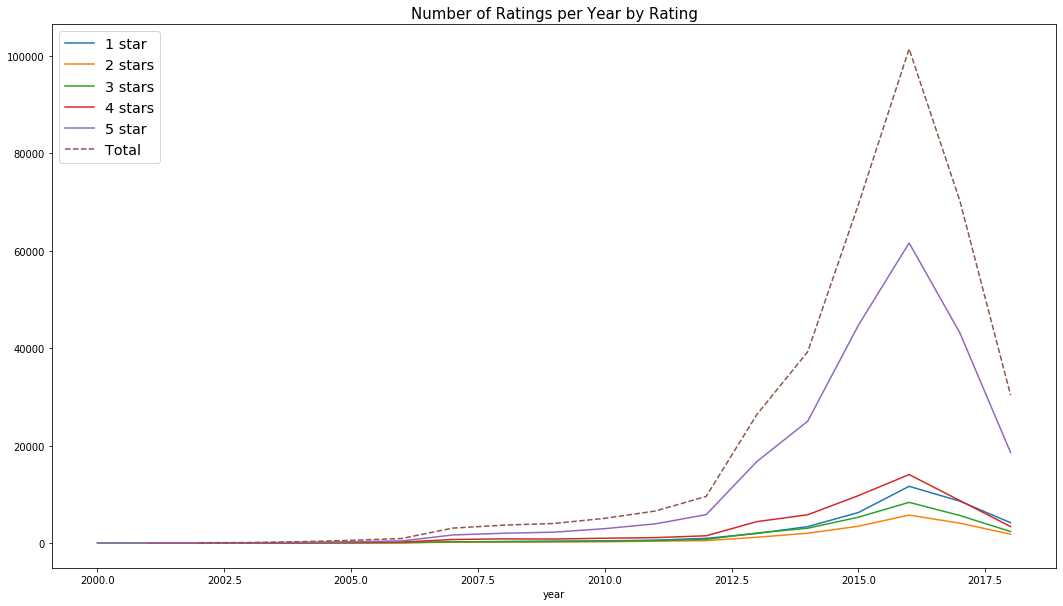

In [12]:
plt.figure(figsize=(18,10))

# Make sure all ratings have the same time frame
time = ['2001', '2002', '2003',
        '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018']
# Separate ratings
one = df[df.rating == 1]
two = df[df.rating == 2]
three = df[df.rating == 3]
four = df[df.rating == 4]
five = df[df.rating == 5]


one_by_year = one.groupby('year').count().rating
two_by_year = two.groupby('year').count().rating
three_by_year = three.groupby('year').count().rating
four_by_year = four.groupby('year').count().rating
five_by_year = five.groupby('year').count().rating


# Plot number of ratings per year per rating
one_by_year.plot()
two_by_year.plot()
three_by_year.plot()
four_by_year.plot()
five_by_year.plot()

# Plot number of ratings per year
plt.plot(df.groupby('year').count().rating[2:], linestyle='--')
plt.title('Number of Ratings per Year by Rating', fontsize=15)

plt.legend(['1 star', '2 stars', '3 stars', '4 stars', '5 star', 'Total'], loc='upper left', fontsize='x-large')
plt.show()


5-star rating is the highest and the lowest is 2-star rating thoughout the data. In the later time of 2017, the 3-star supercede the 4-star rating.

### Top 20 Most Reviewed Brands

In [13]:
# Get the top 20 brands with most reviews
most_brands = df['brand'].value_counts()

# convert the .value_counts() to a dataframe
most_brands = most_brands.rename_axis('brand').reset_index(name='counts')
most_brands = most_brands.sort_values('counts', ascending=False)
most_brands = most_brands.head(20)
most_brands

,brand,counts
0,Waterpik,17061
1,Philips Norelco,12427
2,Perfecto,4862
3,Astra,4578
4,Pre de Provence,3588
5,Helen Of Troy,3386
6,Aquaphor,2882
7,Braun,2636
8,Gillette,2576
9,Bath & Body Works,2525


In [14]:
# Preparing the data for Bokeh
source = ColumnDataSource(most_brands)
brands = most_brands['brand']
counts = most_brands['counts']

In [15]:
# We need to sort the brands from highest to lowest reviews
brands = brands.tolist()     # Convert to list to prevent issues sorting
counts = counts.tolist()

# sorting the bars means sorting the range factors
sorted_brands = sorted(brands, key=lambda x: counts[brands.index(x)], reverse=False)

In [16]:
  # Plotting
p = figure(
  y_range=sorted_brands,
  title = 'Top 20 Brand with Most Reviews',
  x_axis_label ='# of reviews',
  plot_width=800,
  plot_height=600,
  tools=""
)

p.hbar(
    y='brand',
    right='counts',
    source=source,
    left=0,
    height=0.4,
    color='blue',
    fill_alpha=0.5
)
hover.tooltips=[('# of reviews', '@counts'),
                ('brand', '@brand')]

p.add_tools(hover)

show(p)


## Top 20 Most Reviewed Products

In [17]:
# Create dataset for the top 20 products
product_df = df['title'].value_counts()
product_df = product_df.rename_axis('title').reset_index(name='counts')
product_df = product_df.sort_values('counts', ascending=False)
product_df = product_df.head(20)

# Shorten title
product_df["title"] = product_df["title"].str[:50]


source = ColumnDataSource(product_df)
product = product_df['title']
count = product_df['counts']

# We need to sort the brands from highest to lowest reviews
products = product.tolist()     # Convert to list to prevent issues sorting
counts = count.tolist()

# sorting the bars means sorting the range factors
sorted_products = sorted(products, key=lambda x: counts[products.index(x)], reverse=False)


p = figure(
  y_range=sorted_products,
  title = 'Top 20 Products with Most Reviews',
  x_axis_label ='# of reviews',
  plot_width=900,
  plot_height=1000,
  tools=""
)

p.hbar(
    y='title',
    right='counts',
    source=source,
    left=0,
    height=0.4,
    color='blue',
    fill_alpha=0.5
)

hover.tooltips=[('# of reviews', '@counts'),
                ('product', '@title')]

p.add_tools(hover)

show(p)

most number of reviews - Waterpik Ultra Water Flosser

least number of reviews - Philips Sonicare Sonis Electric Rechargeable Toothbrush 